# Linear Regression Assignment
___

## Table Of Contents
- [Problem Statement](#problem-statement)
- [Business Goal](#business-goal)
- [Reading And Understanding Data](#reading-and-understanding-data)
- [Data Dictionary](#data-dictionary)
- [Data Preparation](#data-preparation)
- [Training The Model](#training-the-model)
- [Verifying The Data On The Train Set](#verifying-the-model-on-the-train-set)
- [Predictions And Analysis On The Test Set](#predictions-and-analysis-on-the-test-set)
- [Conclusions](#conclusions)

___

## Problem Statement
>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


>A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


>In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


>They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

>Which variables are significant in predicting the demand for shared bikes.
>How well those variables describe the bike demands
>Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 
___

## Business Goal:
>You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

>For the given problem our target variable is 'cnt'. You have to find the factors affecting the count of total rental bikes including both casual and registered. 
> - create linear model that quantitatively relates rental bikes count with the other variables.
> - know the accuracy of the model.
___

### Steps Involved
- Reading, Understanding and visualizing the data.
- Preparing the data for modelling(train-test split, rescaling etc.)
- Training the model.
- Verifying the model on the train set.
- Predictions and analysis on the test set. 
___

## Reading And Understanding Data

### Import all the required librarires, classes and methods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Supressing library warnings.

In [2]:
warnings.filterwarnings('ignore')

### Read Dataset and Check the kind of data it's storing.

In [3]:
boom_bikes = pd.read_csv('day.csv')
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Dictionary
| Variable | Meaning |
| --- | ----------- |
|instant | Record Index| 
|dteday | Date|
|season | Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)|
|yr | Year (0: 2018, 1:2019)|
| mnth | month ( 1 to 12)|
| holiday | weather day is a holiday or not|
| weekday | day of the week|
|workingday | if day is neither weekend nor holiday is 1, otherwise is 0.|
|temp | temperature in Celsius|	
|atemp| feeling temperature in Celsius|
|hum| humidity|
|windspeed| wind speed|
|casual| count of casual users|
|registered| count of registered users|
|cnt| count of total rental bikes including both casual and registered|
|weathersit | 1 - Clear, Few clouds, Partly cloudy, Partly cloudy.</br> 2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.</br>3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.</br>4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
___

In [4]:
boom_bikes.shape

(730, 16)

**Total Records - 730**</br>
**cells per record - 16**

In [5]:
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Mean, Median, Min, Max, 25 and 75 percntile description of the dataset(Column Wise)**

In [6]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**There are no empty columns and rows in the dataset**
___

### Visualizing the numerical variables

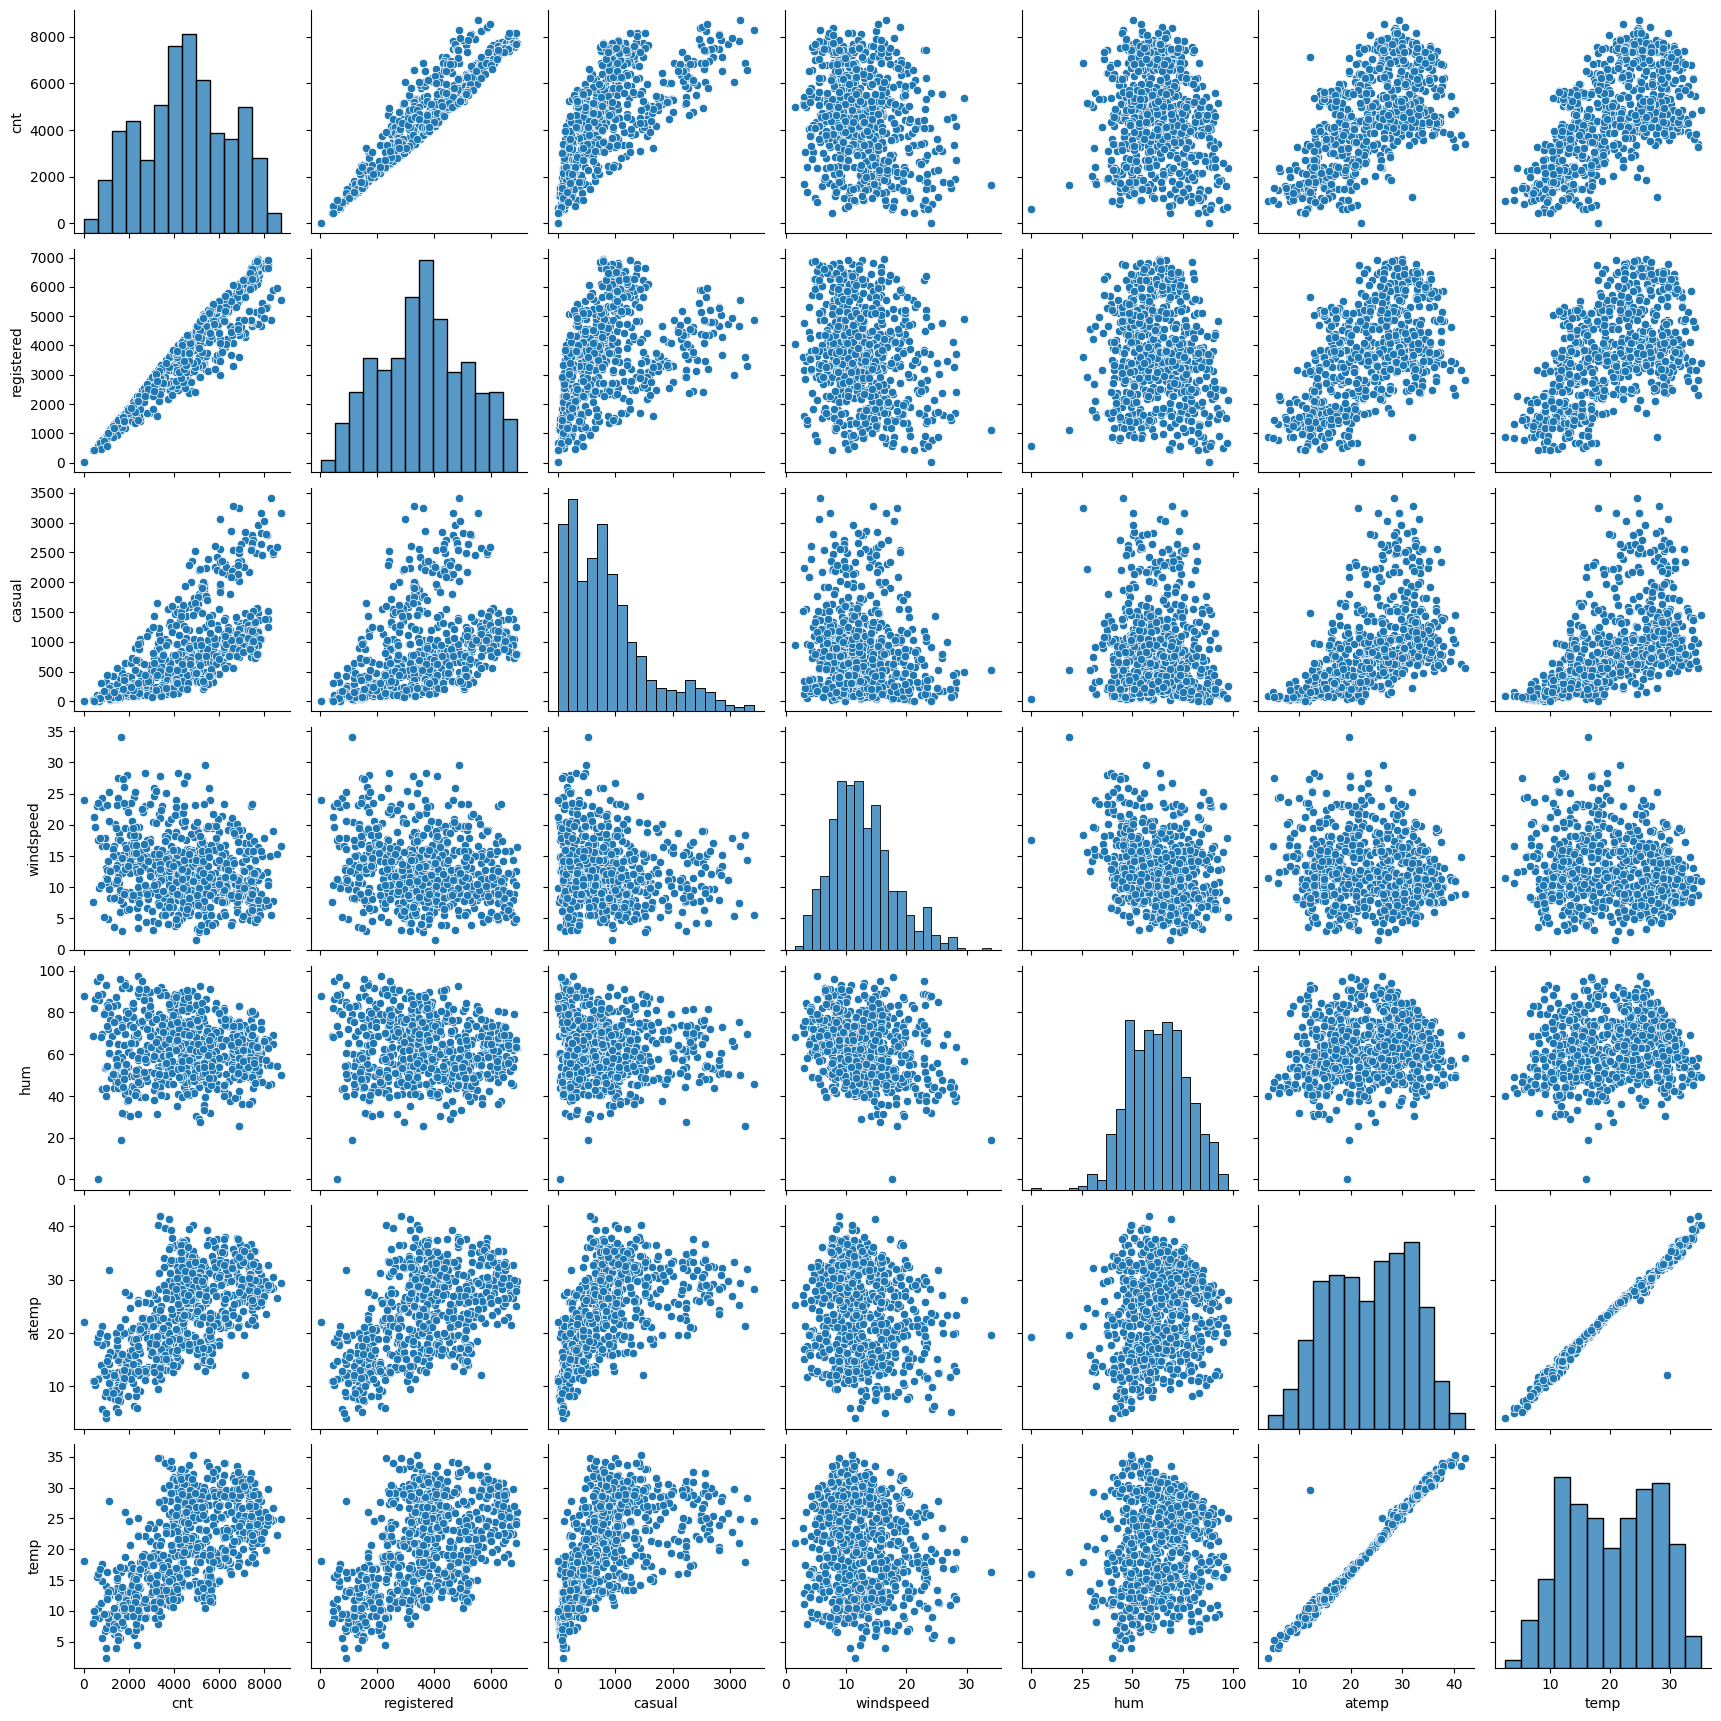

In [7]:
numerical_vars = ['cnt', 'registered', 'casual', 'windspeed', 'hum', 'atemp', 'temp']
sns.pairplot(boom_bikes[numerical_vars])

*as we can see in the pairplot, A few of the numerical variables like temp, atemp and registered has positive relationship and kind of linear relationship with the 'cnt' we can proceed with the linear regression model for the provided data.*

### Visualizing the categorical variables

In [8]:
boom_bikes['season'] = boom_bikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_bikes['mnth'] = boom_bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bikes['weathersit'] = boom_bikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
boom_bikes['weekday'] = boom_bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

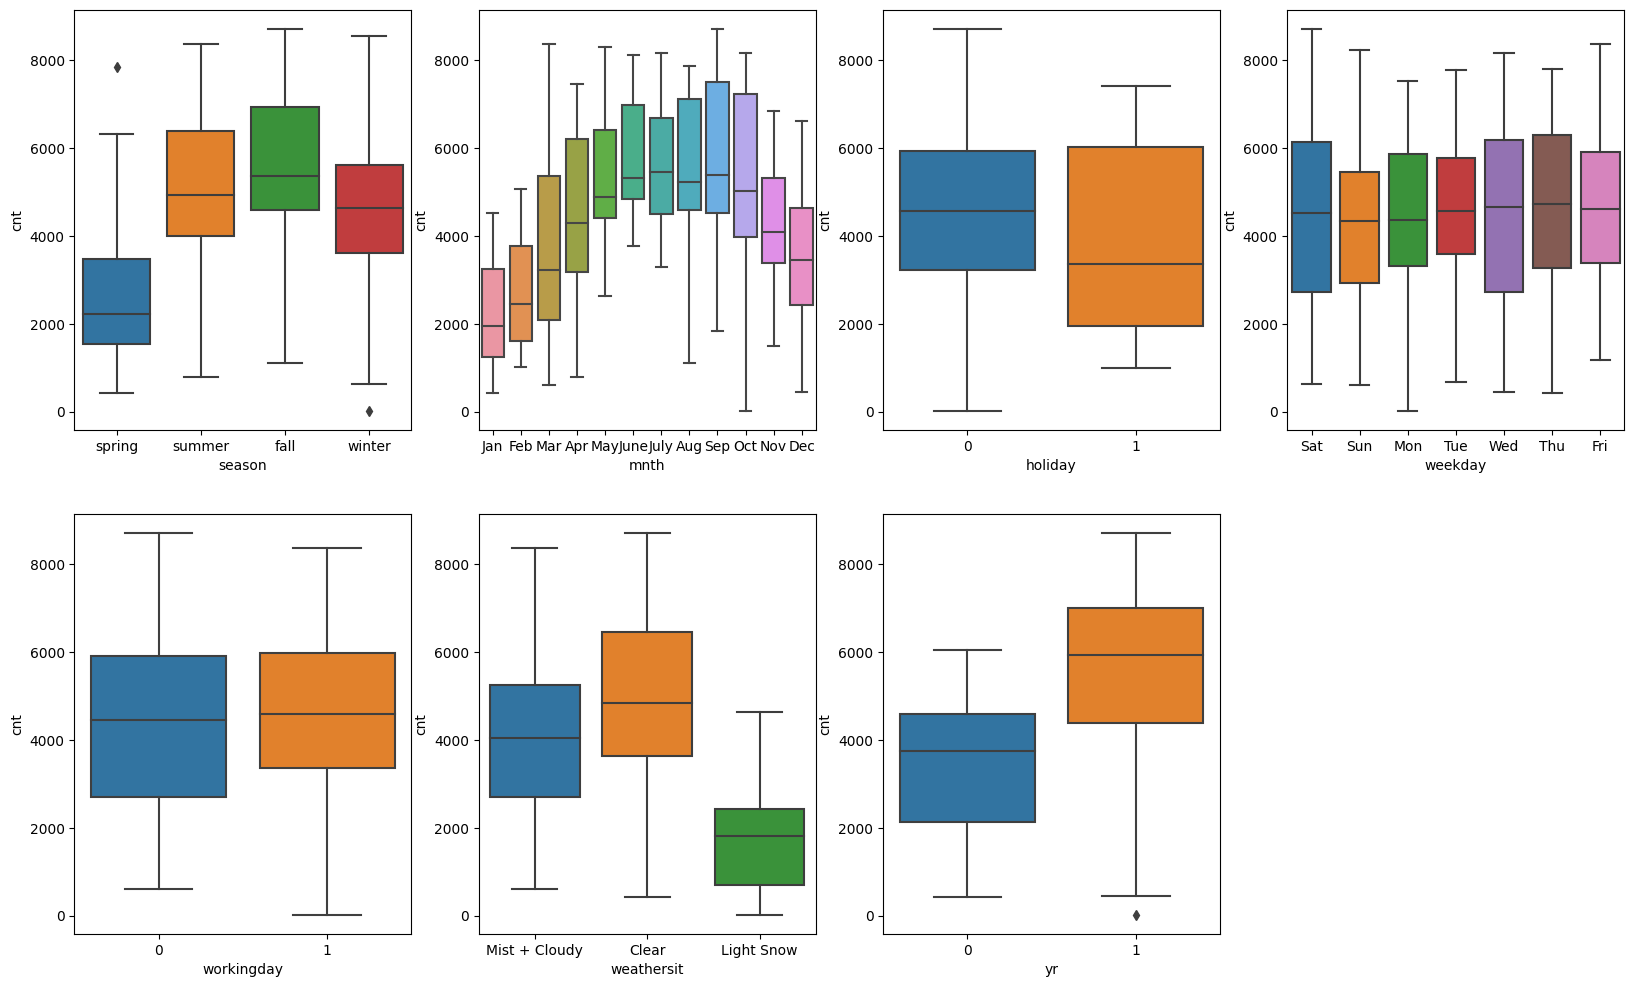

In [9]:
plt.figure(figsize= (20, 12))
plt.subplot(2, 4, 1)
box_plot = sns.boxplot(data = boom_bikes, x = 'season', y = 'cnt')
plt.subplot(2, 4, 2)
box_plot = sns.boxplot(data = boom_bikes, x = 'mnth', y = 'cnt')
plt.subplot(2, 4, 3)
box_plot = sns.boxplot(data = boom_bikes, x = 'holiday', y = 'cnt')
plt.subplot(2, 4, 4)
box_plot = sns.boxplot(data = boom_bikes, x = 'weekday', y = 'cnt')
plt.subplot(2, 4, 5)
box_plot = sns.boxplot(data = boom_bikes, x = 'workingday', y = 'cnt')
plt.subplot(2, 4, 6)
box_plot = sns.boxplot(data = boom_bikes, x = 'weathersit', y = 'cnt')
plt.subplot(2, 4, 7)
box_plot = sns.boxplot(data = boom_bikes, x = 'yr', y = 'cnt')

### Insights shows the relationship between categorical variables and a Target variable.

Bike Rentals are more :
- during the Fall season and then in summer
- in the year 2019 compared to 2018
- in partly cloudy weather
- on Saturday,wednesday and thursday

___

### Univariate Analysis

**Relation between season and count of bike rentals**

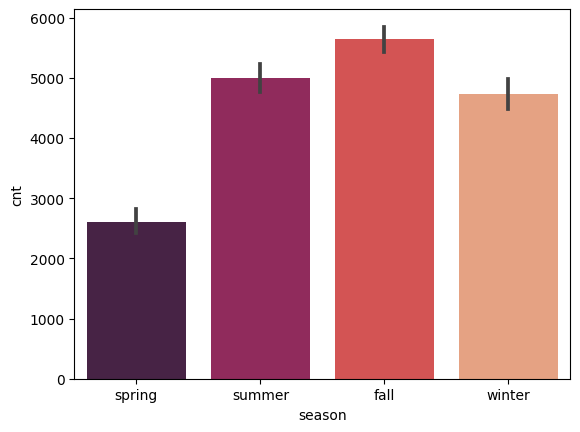

In [10]:
sns.barplot(x = 'season', y = 'cnt',data=boom_bikes,palette="rocket")
plt.show()

**Bike Rentals are more during the Fall season and then in summer**
___

**Relationship between Weathersit and Rentals**

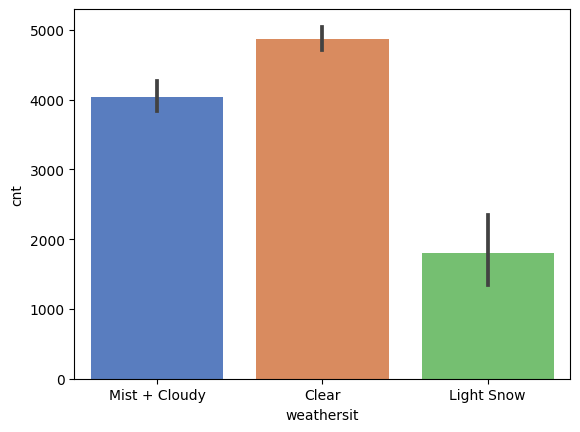

In [11]:
sns.barplot(x = 'weathersit', y = 'cnt',palette="muted",data=boom_bikes)
plt.show()

**Bike Rentals are more in partly cloudy weather**
___

**Relationship between year and rentals**

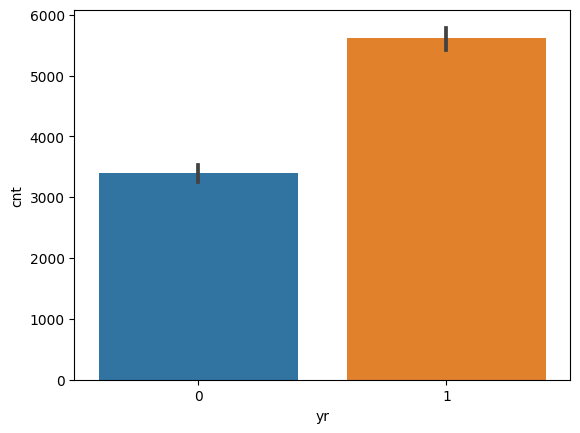

In [12]:
sns.barplot(x = 'yr', y = 'cnt',data=boom_bikes)
plt.show()

**Bike rentals are more in the year 2019 compared to 2018**
___

**Relationship between month(year-wise) and rentals**

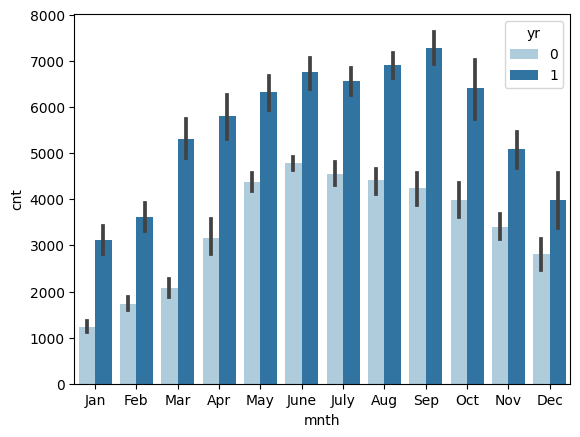

In [13]:
sns.barplot(x = 'mnth', y = 'cnt',hue='yr',data=boom_bikes,palette='Paired')
plt.show()

**Monthly bike rentals are more in the year 2019 compared to 2018**
___

**Relationship between holiday and rentals**

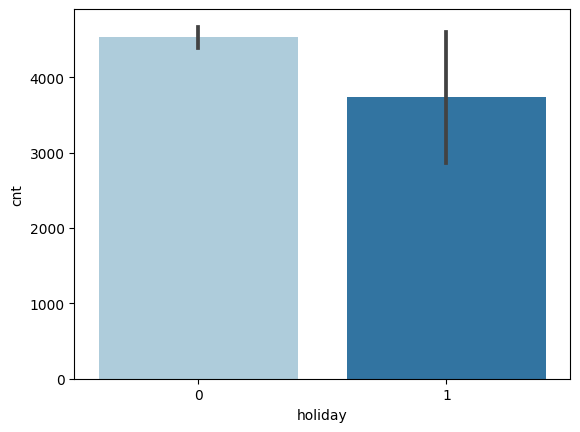

In [14]:
sns.barplot(x = 'holiday', y = 'cnt', data=boom_bikes, palette='Paired')
plt.show()

**Monthly bike rentals are more on working days**
___

**Relationship between working day and rentals**

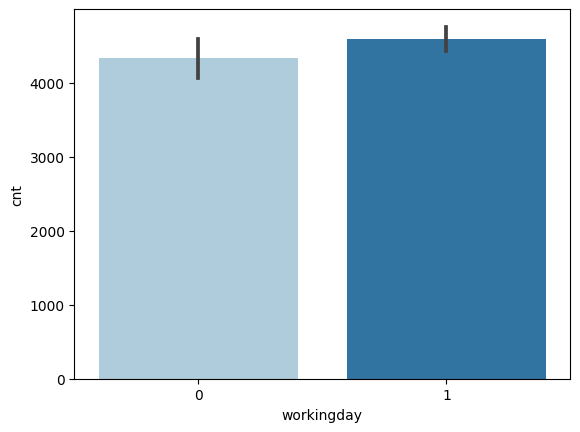

In [15]:
sns.barplot(x = 'workingday', y = 'cnt', data=boom_bikes, palette='Paired')
plt.show()

**Monthly bike rentals are more on working days**
___

**Relationship between temperature and rentals**

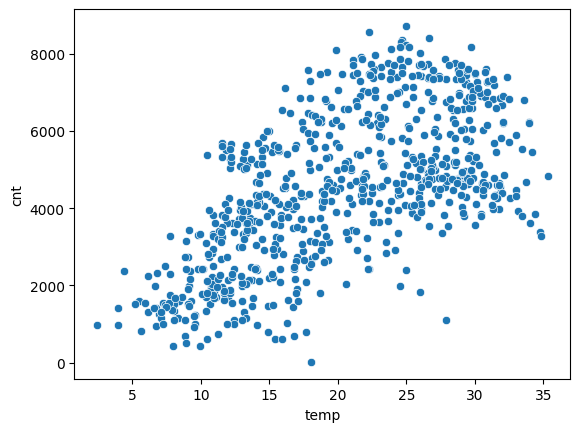

In [16]:
sns.scatterplot(x='temp',y='cnt' ,data = boom_bikes)
plt.show()

**Bike rentals are observed at higher temperatures**
___

**Relationship between humidity and rentals**

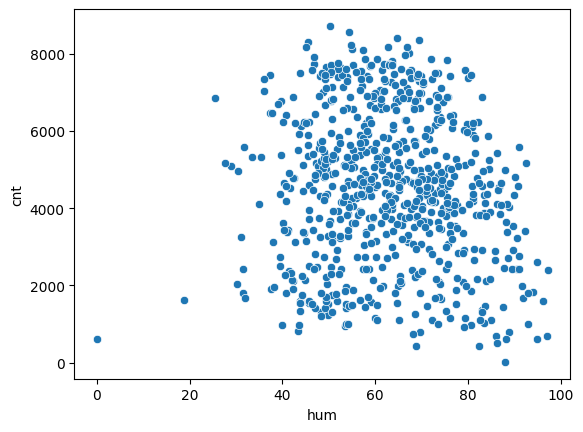

In [17]:
sns.scatterplot(x='hum', y='cnt',data=boom_bikes)
plt.show()

**Bike rentals more at high humidity**
___

## Data Preparation
- Encoding
    - Convert all the binary data to 1 and 0 rather than 'yes' and 'no'.
    - Create dummy variables for categorical variables.
- split into train-test set.

#### Encoding
- Create dummy variables for categorical variables.
- Dropping redundant dummy variables.

In [18]:
boom_bikes = pd.get_dummies(data = boom_bikes, columns = ['season', 'weathersit', 'mnth', 'yr', 'weekday'], dtype=int, drop_first=True)
boom_bikes.head()

boom_bikes.columns

Index(['instant', 'dteday', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr_1', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

#### Split train-test datasets
>Splitting data in 70:30 percent ratio where 70 percent is train data and 30 percent is test data.

**Lets drop some of the irrelevant columns**

In [19]:
boom_bikes.drop(['dteday', 'instant'], axis = 1, inplace = True)

In [20]:
boom_bikes_train, boom_bikes_test = train_test_split(boom_bikes, train_size=0.7, random_state=100)

print(boom_bikes_train.shape, boom_bikes_test.shape)

(510, 32) (220, 32)


### Rescaling
- Min-Max Scaling(Normalization) - Converts all data to range(0, 1) : it takes care of the outliers
- Standardization - Mean : 0 and Standard Deviation : 1

- normalization((x - x(min))/ (x(max) - x(min))
- standardization((x - mu) / sigma)

*We are going to use min-max scaling*

- scale only numeric variables but not binary variables.
- we can scale binary too but we will lose interpretability

**Methods**
___
1. fit : Learns x(min) and x(max)
2. transform : Computes (x - x(min)) / (x(max) - x(min))
3. fit-transform : Fits first and then Transforms.

In [21]:
scaler = MinMaxScaler()

numeric_variables = ['cnt', 'registered', 'casual', 'windspeed', 'hum', 'atemp', 'temp']
boom_bikes_train[numeric_variables] = scaler.fit_transform(boom_bikes_train[numeric_variables])

In [22]:
boom_bikes_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Nov,mnth_Oct,mnth_Sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
576,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,1,0,0,0,0,1,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,1,0,1,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,1,0,0,1,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,1,0,1,0,0,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
boom_bikes_train['cnt'].describe()

count    510.000000
mean       0.513499
std        0.224421
min        0.000000
25%        0.356420
50%        0.518638
75%        0.684710
max        1.000000
Name: cnt, dtype: float64

<Axes: >

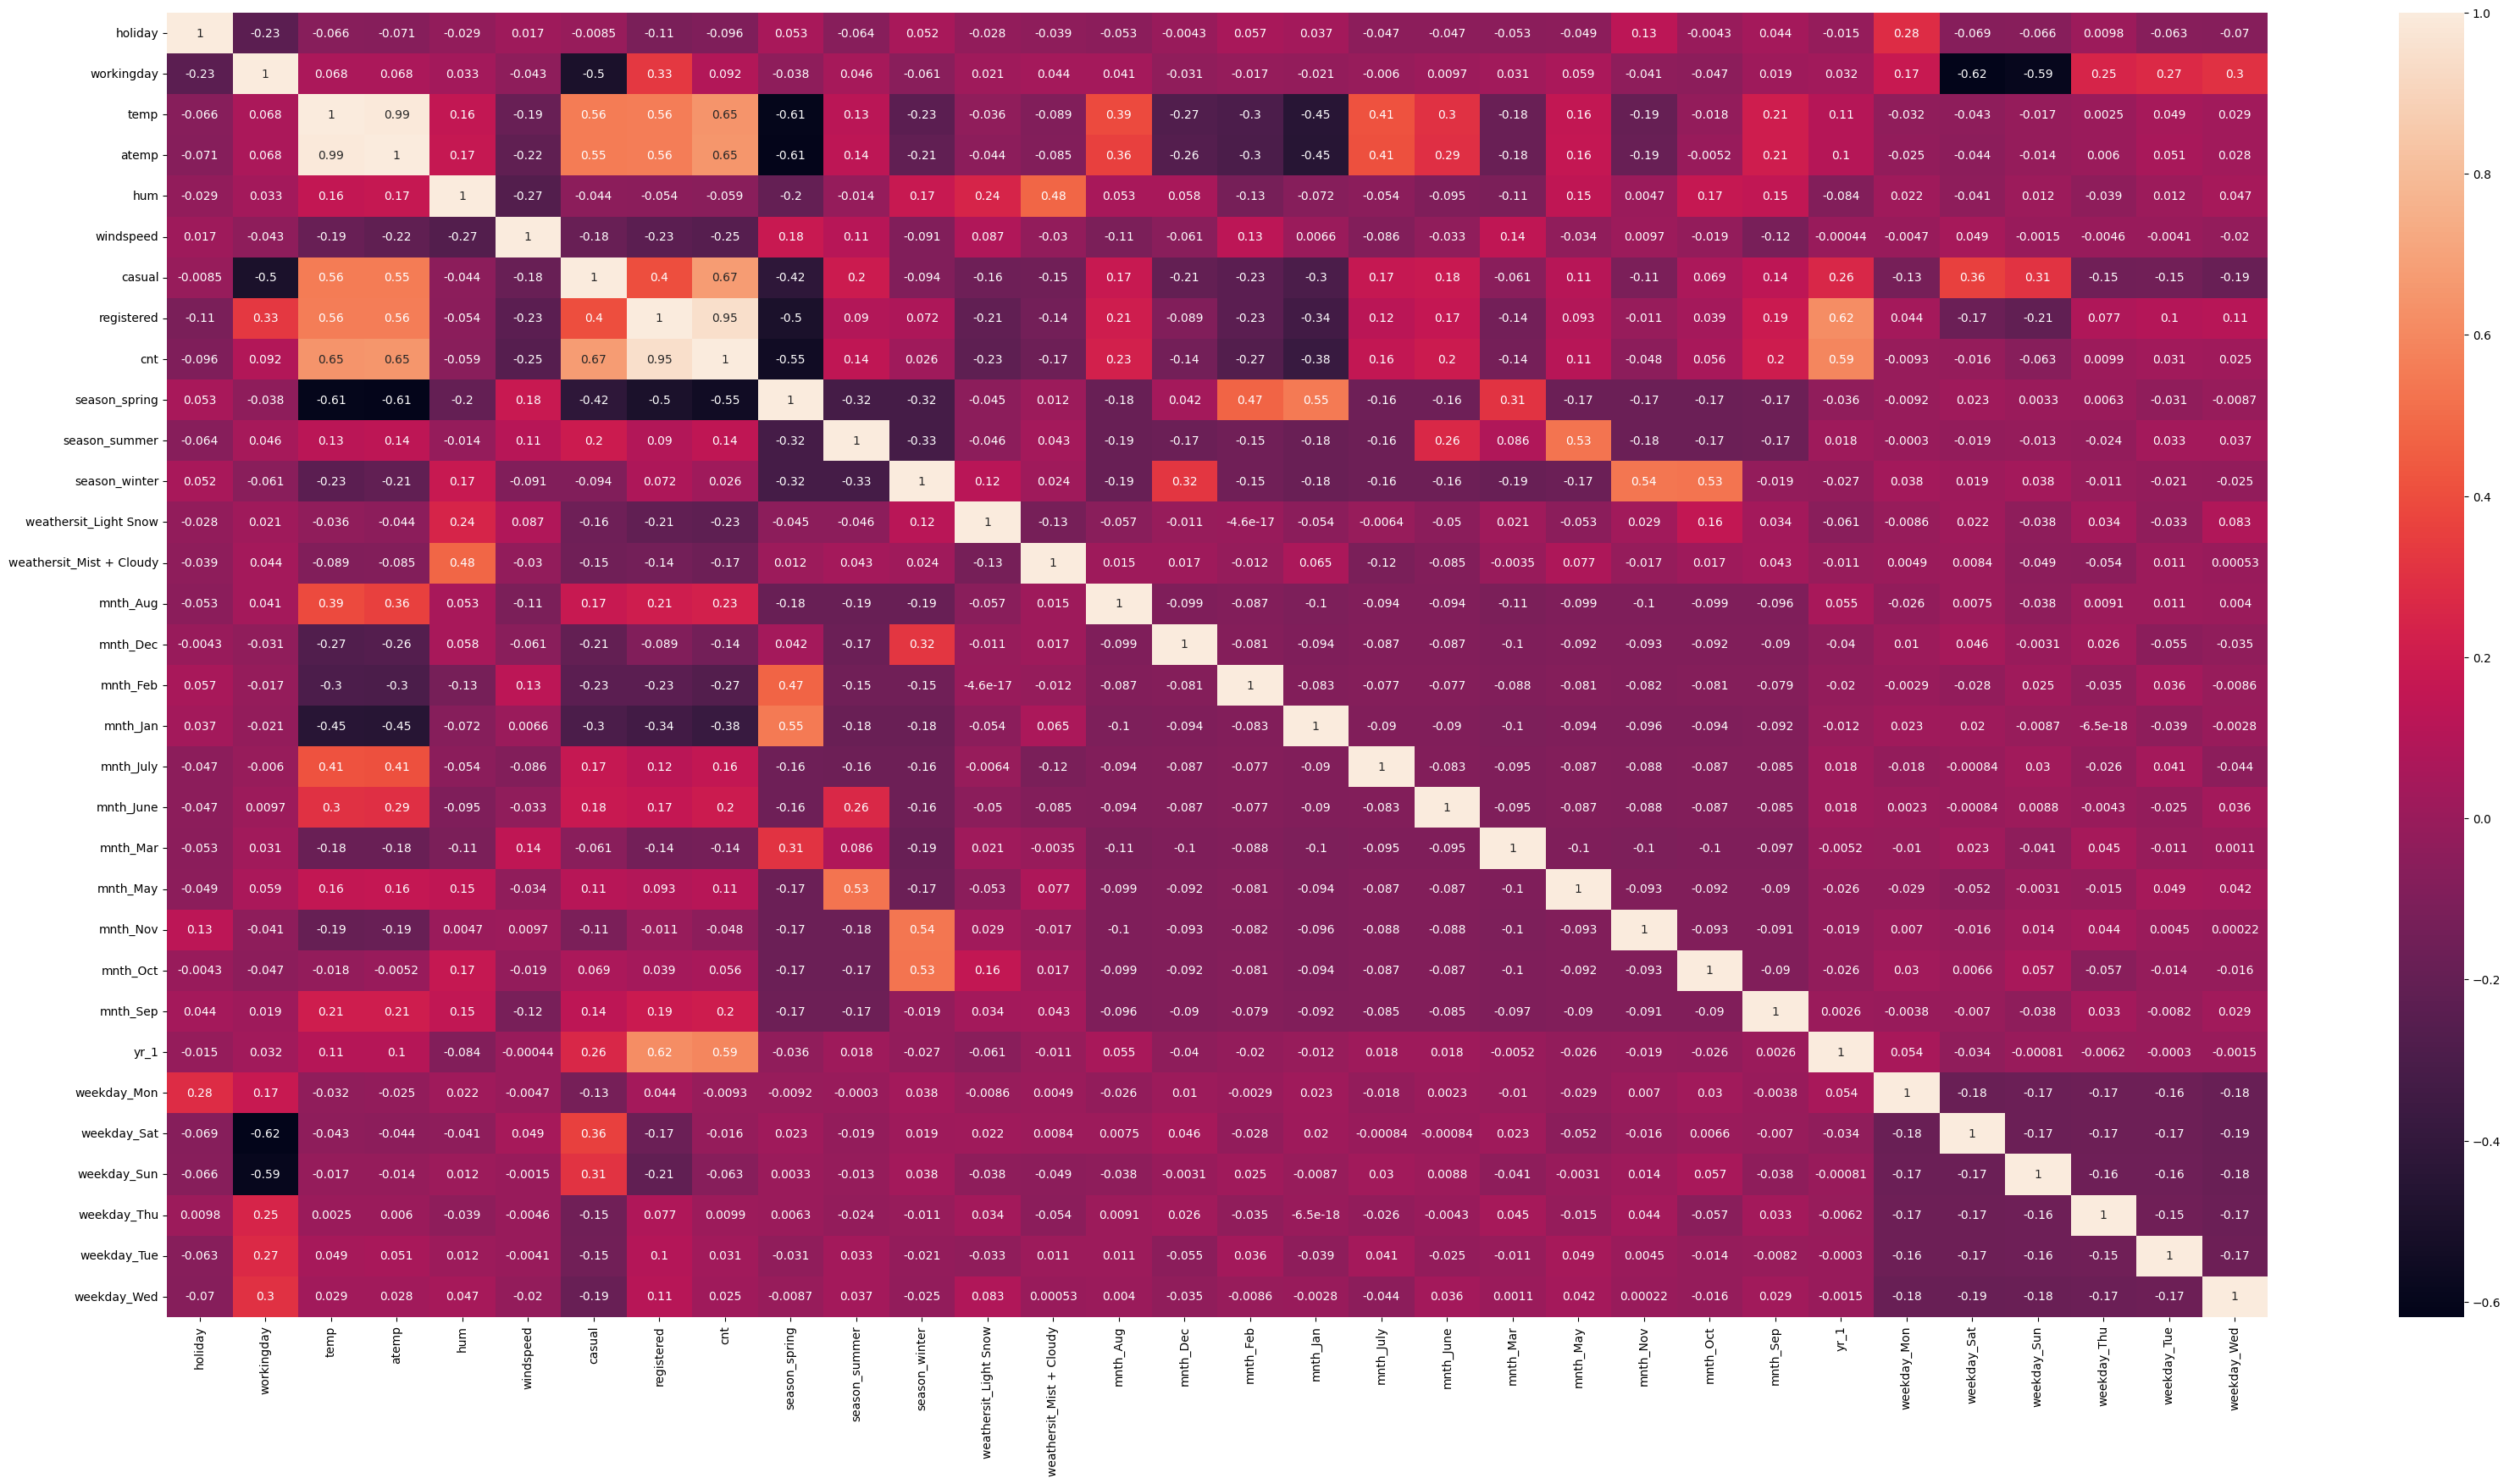

In [24]:
plt.figure(figsize=(40, 20))
sns.heatmap(boom_bikes_train.corr(numeric_only = True), annot=True)

**From the heatmap we can infer that a few of the variables have negative correlation with the 'cnt' and a few have very strong correlation with the 'cnt' so now we can start building predictive model with the help of data available.**

**Removing variables which are not required**

In [25]:
boom_bikes_train.drop(['registered', 'casual'], inplace = True, axis = 1)

## Training the model

#### Steps involved
- Creating X(Predictors) and y(target) for the model.
- Using Recurrsive Feature Elimination selecting top 'X' variables that can explain our target variable.
- Based on the correlation, VFI and P-Value drop the predictors one by one and check if the model is accurate.
- Repeat the above step until we get a model with appropriate P-Values and VIFs of all the predictors.

**Lets create X and y for the model.**

In [26]:
y_boom_bikes_train = boom_bikes_train.pop('cnt')
X_boom_bikes_train = boom_bikes_train

In [27]:
lm = LinearRegression()
lm.fit(X_boom_bikes_train, y_boom_bikes_train)

boom_bikes_rfe = RFE(lm, n_features_to_select = 15)
boom_bikes_rfe = boom_bikes_rfe.fit(X_boom_bikes_train, y_boom_bikes_train)

In [28]:
list(zip(X_boom_bikes_train.columns, boom_bikes_rfe.support_, boom_bikes_rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('yr_1', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12)]

**support tells if variable is selected**

In [29]:
col = X_boom_bikes_train.columns[boom_bikes_rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy', 'mnth_Jan', 'mnth_July', 'mnth_Sep', 'yr_1',
       'weekday_Sat'],
      dtype='object')

**List of all the selected columns using RFE**

In [30]:
X_train_boom_bikes_new = X_boom_bikes_train[col]
X_train_boom_bikes_rfe = X_train_boom_bikes_new
X_train_boom_bikes_rfe = sm.add_constant(X_train_boom_bikes_rfe)
lm = sm.OLS(y_boom_bikes_train, X_train_boom_bikes_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          4.22e-191
Time:                        14:59:26   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2519      0.036      6.969      0.000       0.181       0.323
holiday                     -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                   0.0433      0.012      3.762      0.000       0.021       0.066
temp                         0.5096      0.034     14.837      0.000       0.442       0.577
hum                         -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                   -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring               -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer                0.0508      0.015      3.423      0.001       0.022       0.080
season_winter                0.0933      0.017      5.403      0.000       0.059       0.127
weathersit_Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
mnth_Jan                    -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_July                   -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                     0.0814      0.016      4.945      0.000       0.049       0.114
yr_1                         0.2305      0.008     28.795      0.000       0.215       0.246
weekday_Sat                  0.0536      0.014      3.694      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Points to look out in model summary**
- P > |t|(p-value) should be less. Lesser P-Value implies higher significance of the variable.
- R-Squared - how much variance of the values can be justified by our model. It should be higher for a good model.
- Adj R-Squared - Higher means good model. adj R-Squared = 1 - [(1- R^2)(N - 1)/(N- p - 1)]. Where N is the sample size, R^2 is Sample R-Squared and p is the number of independant variables.
- Prob (F-statistic): should be approximately zero

>**Variance Inflation Factor(VIF)** - A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity.

In [31]:
def print_vif():
    """
    Prints the VIF values of all the variables of the dataset.
    """
    # VIF (1/ (1 - R2))
    vif = pd.DataFrame()
    vif['Features'] = X_train_boom_bikes_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_boom_bikes_new.values, i) for i in range(X_train_boom_bikes_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending=False)

    print(vif)

In [32]:
print_vif()

                    Features    VIF
3                        hum  29.37
2                       temp  17.78
1                 workingday   5.31
4                  windspeed   4.73
5              season_spring   4.53
7              season_winter   3.46
6              season_summer   2.85
9   weathersit_Mist + Cloudy   2.29
13                      yr_1   2.09
14               weekday_Sat   1.98
10                  mnth_Jan   1.67
11                 mnth_July   1.59
12                  mnth_Sep   1.39
8      weathersit_Light Snow   1.24
0                    holiday   1.18


In [33]:
def rebuild_model(col):
    """
    Rebuilds a model after removing a specified column.
    @param col : column to be dropped from the dataset

    #return updated dataset
    #return new model
    """
    X_train_boom_bikes_new.pop(col)
    X_train_boom_bikes_rfe = X_train_boom_bikes_new
    X_train_boom_bikes_rfe = sm.add_constant(X_train_boom_bikes_rfe)
    return X_train_boom_bikes_rfe, sm.OLS(y_boom_bikes_train, X_train_boom_bikes_rfe).fit()

#### Dropping 'hum'

- Dropping 'hum' because of high VIF and negative correlation with cnt.

In [34]:
X_train_boom_bikes_rfe, lm = rebuild_model('hum')
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          1.60e-188
Time:                        14:59:27   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1737      0.031      5.520      0.000       0.112       0.235
holiday                     -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                   0.0464      0.012      3.966      0.000       0.023       0.069
temp                         0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                   -0.1563      0.025     -6.286      0.000      -0.205      -0.107
season_spring               -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer                0.0445      0.015      2.967      0.003       0.015       0.074
season_winter                0.0784      0.017      4.562      0.000       0.045       0.112
weathersit_Light Snow       -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist + Cloudy    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
mnth_Jan                    -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_July                   -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sep                     0.0755      0.017      4.527      0.000       0.043       0.108
yr_1                         0.2345      0.008     29.009      0.000       0.219       0.250
weekday_Sat                  0.0583      0.015      3.968      0.000       0.029       0.087
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print_vif()

                    Features   VIF
2                       temp  7.07
1                 workingday  5.24
3                  windspeed  4.68
4              season_spring  3.07
5              season_summer  2.34
12                      yr_1  2.08
6              season_winter  1.98
13               weekday_Sat  1.97
9                   mnth_Jan  1.62
10                 mnth_July  1.59
8   weathersit_Mist + Cloudy  1.58
11                  mnth_Sep  1.35
0                    holiday  1.17
7      weathersit_Light Snow  1.09


#### Dropping 'holiday'

- Dropping 'holiday' because of negative correlation with cnt

In [36]:
X_train_boom_bikes_rfe, lm = rebuild_model('holiday')
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          8.68e-189
Time:                        14:59:27   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1657      0.031      5.292      0.000       0.104       0.227
workingday                   0.0546      0.011      4.967      0.000       0.033       0.076
temp                         0.4724      0.034     13.966      0.000       0.406       0.539
windspeed                   -0.1572      0.025     -6.306      0.000      -0.206      -0.108
season_spring               -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer                0.0448      0.015      2.980      0.003       0.015       0.074
season_winter                0.0775      0.017      4.499      0.000       0.044       0.111
weathersit_Light Snow       -0.2896      0.024    -11.895      0.000      -0.337      -0.242
weathersit_Mist + Cloudy    -0.0807      0.009     -9.351      0.000      -0.098      -0.064
mnth_Jan                    -0.0398      0.018     -2.252      0.025      -0.074      -0.005
mnth_July                   -0.0468      0.018     -2.549      0.011      -0.083      -0.011
mnth_Sep                     0.0736      0.017      4.406      0.000       0.041       0.106
yr_1                         0.2346      0.008     28.941      0.000       0.219       0.251
weekday_Sat                  0.0667      0.014      4.710      0.000       0.039       0.094
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print_vif()

                    Features   VIF
1                       temp  6.82
0                 workingday  4.68
2                  windspeed  4.66
3              season_spring  2.99
4              season_summer  2.33
11                      yr_1  2.08
5              season_winter  1.91
12               weekday_Sat  1.84
8                   mnth_Jan  1.62
9                  mnth_July  1.59
7   weathersit_Mist + Cloudy  1.58
10                  mnth_Sep  1.34
6      weathersit_Light Snow  1.09


#### Dropping 'mnth_Jan'

- Dropping mnth_Jan because of high p-value and negative correlation with cnt

In [38]:
X_train_boom_bikes_rfe, lm = rebuild_model('mnth_Jan')
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          7.12e-189
Time:                        14:59:27   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1492      0.031      4.881      0.000       0.089       0.209
workingday                   0.0545      0.011      4.938      0.000       0.033       0.076
temp                         0.4920      0.033     14.991      0.000       0.427       0.556
windspeed                   -0.1499      0.025     -6.040      0.000      -0.199      -0.101
season_spring               -0.0664      0.021     -3.182      0.002      -0.107      -0.025
season_summer                0.0481      0.015      3.196      0.001       0.019       0.078
season_winter                0.0838      0.017      4.910      0.000       0.050       0.117
weathersit_Light Snow       -0.2883      0.024    -11.795      0.000      -0.336      -0.240
weathersit_Mist + Cloudy    -0.0817      0.009     -9.428      0.000      -0.099      -0.065
mnth_July                   -0.0486      0.018     -2.637      0.009      -0.085      -0.012
mnth_Sep                     0.0740      0.017      4.414      0.000       0.041       0.107
yr_1                         0.2339      0.008     28.756      0.000       0.218       0.250
weekday_Sat                  0.0664      0.014      4.671      0.000       0.038       0.094
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
print_vif()

                    Features   VIF
1                       temp  6.73
0                 workingday  4.66
2                  windspeed  4.64
3              season_spring  2.38
4              season_summer  2.32
10                      yr_1  2.07
5              season_winter  1.91
11               weekday_Sat  1.83
8                  mnth_July  1.58
7   weathersit_Mist + Cloudy  1.57
9                   mnth_Sep  1.34
6      weathersit_Light Snow  1.08


#### Drop 'windspeed'

- Dropping windspeed because of negative correlation with the cnt.

In [40]:
X_train_boom_bikes_rfe, lm = rebuild_model('windspeed')
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          1.94e-182
Time:                        14:59:27   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0989      0.030      3.248      0.001       0.039       0.159
workingday                   0.0556      0.011      4.866      0.000       0.033       0.078
temp                         0.5038      0.034     14.860      0.000       0.437       0.570
season_spring               -0.0760      0.022     -3.528      0.000      -0.118      -0.034
season_summer                0.0381      0.015      2.462      0.014       0.008       0.068
season_winter                0.0850      0.018      4.811      0.000       0.050       0.120
weathersit_Light Snow       -0.3032      0.025    -12.045      0.000      -0.353      -0.254
weathersit_Mist + Cloudy    -0.0799      0.009     -8.919      0.000      -0.098      -0.062
mnth_July                   -0.0487      0.019     -2.554      0.011      -0.086      -0.011
mnth_Sep                     0.0783      0.017      4.517      0.000       0.044       0.112
yr_1                         0.2329      0.008     27.665      0.000       0.216       0.249
weekday_Sat                  0.0642      0.015      4.367      0.000       0.035       0.093
==============================================================================
Omnibus:                       76.254   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.812
Skew:                          -0.729   Prob(JB):                     1.67e-46
Kurtosis:                       5.792   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
print_vif()

                    Features   VIF
1                       temp  6.03
0                 workingday  4.63
9                       yr_1  2.07
3              season_summer  2.06
10               weekday_Sat  1.81
2              season_spring  1.78
4              season_winter  1.73
7                  mnth_July  1.58
6   weathersit_Mist + Cloudy  1.57
8                   mnth_Sep  1.34
5      weathersit_Light Snow  1.07


#### Drop 'mnth_July'
- Dropping 'mnth_July' column because of p-value 

In [42]:
X_train_boom_bikes_rfe, lm = rebuild_model('mnth_July')
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          3.10e-182
Time:                        14:59:27   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0902      0.030      2.964      0.003       0.030       0.150
workingday                   0.0566      0.011      4.924      0.000       0.034       0.079
temp                         0.4914      0.034     14.564      0.000       0.425       0.558
season_spring               -0.0650      0.021     -3.060      0.002      -0.107      -0.023
season_summer                0.0527      0.014      3.642      0.000       0.024       0.081
season_winter                0.0970      0.017      5.666      0.000       0.063       0.131
weathersit_Light Snow       -0.3041      0.025    -12.017      0.000      -0.354      -0.254
weathersit_Mist + Cloudy    -0.0786      0.009     -8.743      0.000      -0.096      -0.061
mnth_Sep                     0.0916      0.017      5.508      0.000       0.059       0.124
yr_1                         0.2334      0.008     27.580      0.000       0.217       0.250
weekday_Sat                  0.0645      0.015      4.365      0.000       0.035       0.094
==============================================================================
Omnibus:                       77.597   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.504
Skew:                          -0.754   Prob(JB):                     1.44e-45
Kurtosis:                       5.728   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
print_vif()

                   Features   VIF
1                      temp  4.72
0                workingday  4.63
8                      yr_1  2.07
9               weekday_Sat  1.81
3             season_summer  1.75
2             season_spring  1.70
4             season_winter  1.59
6  weathersit_Mist + Cloudy  1.57
7                  mnth_Sep  1.23
5     weathersit_Light Snow  1.07


**Now the VIFs of all the variables are under 5 and all the p-values are under 0.02, so our model seems good to proceed with**
___

## Verifying the model on the train set

#### Distribution plot for residual analysis

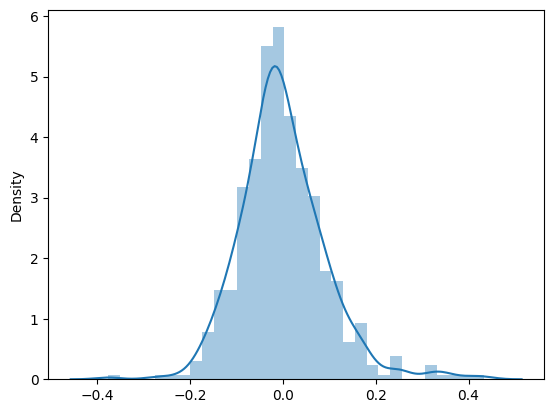

In [44]:
y_pred_train_boom_bikes = lm.predict(X_train_boom_bikes_rfe)

res = y_pred_train_boom_bikes - y_boom_bikes_train
sns.distplot(res)
plt.show()

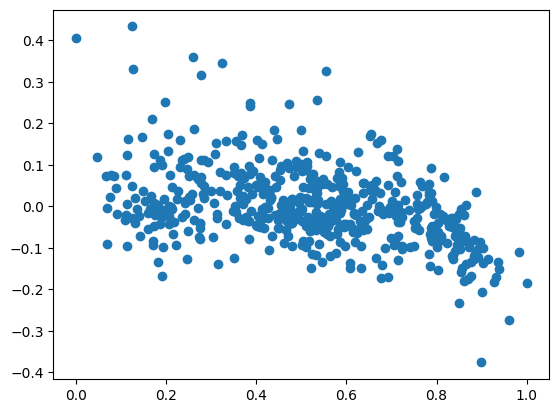

In [52]:
plt.scatter(x = y_boom_bikes_train, y = res)

**The variance in the error terms seems constant**

**Inferences from the residual analysis**
- There is not pattern in the error data.
- Mean is almost 0. 
- The plot appears to be normal distributtion.

## Predictions and analysis on the test set

#### Steps involved
- Apply the scaling on the test dataset.
- Create X(predictors) and y(target) for the test data.
- Add the constant for the X_test
- Predict target variable.
- Draw a Q-Q plot b/w the predicted and the actual test values.
- Calulate the final equation.
- Conclusion

#### Apply the scale on the test data which was calculated using the train data

In [45]:
boom_bikes_test[numeric_variables] = scaler.transform(boom_bikes_test[numeric_variables])
boom_bikes_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Nov,mnth_Oct,mnth_Sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
184,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,0,0,1,0,0,0,0,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,0,0,1,0,0,0,0,0,1
299,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,0,1,0,0,0,0,0,1,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,0,0,0,1
152,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,0,...,0,0,0,0,0,0,0,1,0,0


**Normalized test set**

In [46]:
boom_bikes_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Nov,mnth_Oct,mnth_Sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154,0.254545,...,0.072727,0.086364,0.086364,0.481818,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163,0.436599,...,0.260281,0.281541,0.281541,0.500809,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Create X_test and y_test

**Ignore the variables which are not present in the final train model.**

In [47]:
y_boom_bikes_test = boom_bikes_test.pop('cnt')
X_boom_bikes_test = boom_bikes_test[X_train_boom_bikes_new.columns]

#### Adding constant to the test data as statsmodels didn't add the constant by default

In [48]:
X_boom_bikes_test_sm = sm.add_constant(X_boom_bikes_test)

#### Calculating the predicted values using the designed model

In [49]:
y_boom_bikes_test_pred = lm.predict(X_boom_bikes_test_sm)

#### Plotting a Q-Q plot between actual and predicted test data count values
>The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

0.812


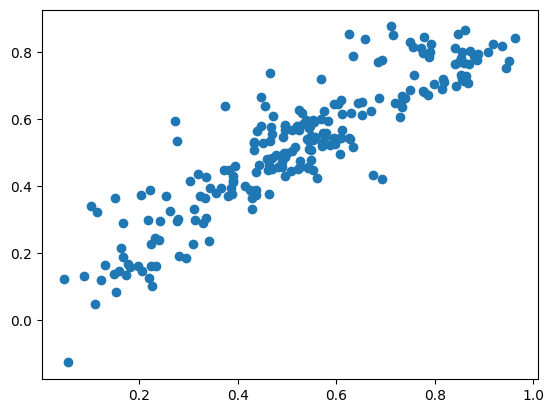

In [50]:
print(round(r2_score(y_boom_bikes_test, y_boom_bikes_test_pred), 3))

plt.scatter(y_boom_bikes_test, y_boom_bikes_test_pred)
plt.show()

### Final Equation

**y = 0.0902 + (0.4914)Temperature + (0.2334)Year + (0.0970)Winter + (0.0916)September + (0.0645)Saturday + (0.0566)WorkingDay + (0.0527)Summer + (-0.0650)Spring + (-0.0786)Mist + Cloudy + (-0.3041)LightSnow**

R-Squared(Training Set) - 0.826 </br>
Adj R-Squared(Training Set) - 0.822 </br>
R-Squared(Testing Set) - 0.812 </br>

>*We can see that the adjusted R-Squared and R-Squared doesn't have much difference. Also, Testing R-Squared and Trainging R-Squared are almost similar. So, We can conclude that our model is quite good.*

### Conclusions


- Temperature could be a prime factor for making decision for the Organisation
- The demand for bikes was more in 2019 than in 2018.
- Working days as they have good influence on bike rentals. So it would be great to provide offers to the working individuals.
____